# Phase 1 Code Challenge Review

![let's do this](https://media.giphy.com/media/BpGWitbFZflfSUYuZ9/giphy.gif)

The topics covered will be:

  - [Interacting with Pandas dataframes](#dataframes)
  - [Visualization](#viz)
  - [Python Data Structures](#datastructures)
    

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='dataframes'></a>
# DataFrames

To practice working with dataframes, we will use some Facebook data taken from the UCI Machine Learning repository.

Refer to this paper if you are interested in learning more. There is also a nice description of the features: http://www.math-evry.cnrs.fr/_media/members/aguilloux/enseignements/m1mint/moro2016.pdf



# Task 1

Read 'dataset_Facebook.csv' from data/Facebook_metrics into the notebook as a Pandas dataframe.

In [330]:
# Your code here
facebook = pd.read_csv('data/Facebook_metrics/dataset_Facebook.csv', delimiter = ";")

In [331]:
facebook

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


# Task 2

### 2a: Count how many na's there are in each column
 

In [140]:
# Your code here
facebook.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

### 2b: Drop records that have na's in any column without altering the dataframe in memory
 

In [137]:
# Your code here
facebook.dropna()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


### 2c: Drop records that have na's in the `share` column while altering the dataframe in memory

In [340]:
new_list = facebook['Type'].groupby(facebook['Type']).count().nlargest(5)
new_list.index.values.tolist()


['Photo', 'Status', 'Link', 'Video']

In [139]:
# Your code here
facebook.dropna(subset=['share'],inplace=True)

# Task 3

An impression is each time a post is displayed.  

Create a new column called `likes_per_impression` which divides the number of comments per post by the number of likes per post.

In [281]:
# Your code here
facebook['likes_per_impression'] = facebook['comment']/facebook['like']

In [282]:
facebook['likes_per_impression']

0      0.050633
1      0.038462
2      0.000000
3      0.036896
4      0.058462
         ...   
495    0.094340
496    0.000000
497    0.043011
498    0.076923
499    0.000000
Name: likes_per_impression, Length: 496, dtype: float64

# Task 4

Locate the `record` of a **Photo** that has the largest value in the `like` column

In [55]:
photo = facebook['Type'] == 'Photo'
photo

0       True
1      False
2       True
3       True
4       True
       ...  
494     True
495     True
496     True
497     True
498     True
Name: Type, Length: 495, dtype: bool

In [47]:
top = facebook.groupby('Type')['like'].max()
top

Type
Link       379.0
Photo     5172.0
Status     859.0
Video      449.0
Name: like, dtype: float64

In [58]:
record = top[top.index.get_level_values('Type')== 'Photo']
record

Type
Photo    5172.0
Name: like, dtype: float64

# Task 5
What is the mean number of Total Interactions for photos?

In [289]:
# Your code here
mean = facebook.groupby('Type')['Total Interactions'].mean()
mean_interactions_photos = mean[mean.index.get_level_values('Type') == 'Photo']
mean_interactions_photos

Type
Photo    218.56872
Name: Total Interactions, dtype: float64

In [283]:
facebook[facebook['Type']=='Photo']['Total Interactions'].mean()

218.56872037914692

<a id='viz'></a>
# Visualization

# Task 6

Create a bar chart showing the number of posts per month.
Order the x-axis by month as they appear on the calendar.
Don't forget to add labels and a title.  

Use the `plt.subplot` method if you can, but if you can't, resort to the `plt` syntax.

In [288]:
facebook.groupby('Post Month')['Post Month'].count()

Post Month
1     25
2     26
3     36
4     50
5     37
6     49
7     52
8     34
9     35
10    57
11    45
12    50
Name: Post Month, dtype: int64

<AxesSubplot:title={'center':'Posts by Month'}, xlabel='Post Month', ylabel='# of Posts'>

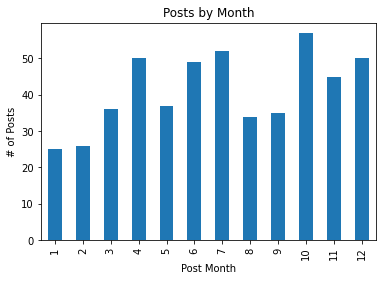

In [316]:
df = facebook.groupby('Post Month')['Post Month'].count()
plt.ylabel('# of Posts')
plt.title("Posts by Month")
df.plot.bar()

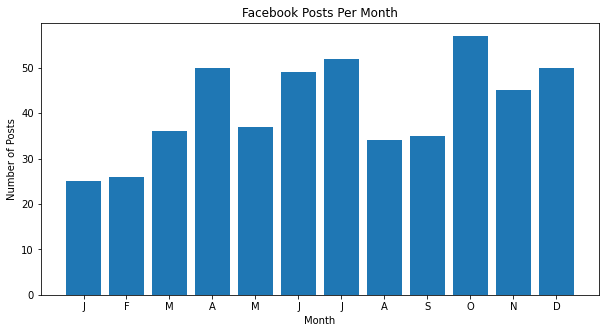

In [290]:
x = facebook['Post Month'].value_counts().sort_index().index
y = facebook['Post Month'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Facebook Posts Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));

# Task 7

Create a scatter plot that shows the correlation between total interactions and likes.

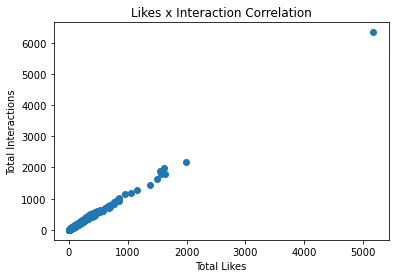

In [132]:
# Your code here
plt.ylabel('Total Interactions')
plt.xlabel('Total Likes')
plt.title('Likes x Interaction Correlation')
plt.scatter(facebook['like'], facebook['Total Interactions'])

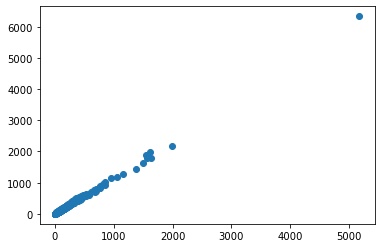

In [291]:
fig, ax = plt.subplots()
ax.scatter(facebook['like'], facebook['Total Interactions'])

<a id='datastructures'></a>
# Data Structures

For this next section, we will explore a nested dictionary that comes from the Spotify API.  

The `data` variable below contains 6 separate pings, each of which returns a list of the top 20 songs streamed on a given day.


In [85]:
with open('data/offset_newreleases.p','rb') as read_file:
    responses = pickle.load(read_file)

In [86]:
data = [json.loads(r) for r in responses]

In [87]:
len(data)

6

We will work only with the first response.

In [88]:
first_response = data[0]

In [89]:
first_response

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
      'href': 'https://api.spotify.com/v1/artists/7CajNmpbOovFoOoasH2HaY',
      'id': '7CajNmpbOovFoOoasH2HaY',
      'name': 'Calvin Harris',
      'type': 'artist',
      'uri': 'spotify:artist:7CajNmpbOovFoOoasH2HaY'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
      'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
      'id': '1Xyo4u8uXC1ZmMpatF05PJ',
      'name': 'The Weeknd',
      'type': 'artist',
      'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
    'available_markets': ['AD',
     'AE',
     'AL',
     'AR',
     'AT',
     'AU',
     'BA',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'BY',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
  

# Task 8

Explore the `first_response` dictionary and find how to access the list of twenty songs.
Assign the list to the variable `first_twenty_songs`.
Hint: print out the keys at each level with .keys().

In [297]:
# Your code here
first_twenty_songs = first_response['albums']['items']

In [293]:
first_response['albums']['items']

[{'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
    'href': 'https://api.spotify.com/v1/artists/7CajNmpbOovFoOoasH2HaY',
    'id': '7CajNmpbOovFoOoasH2HaY',
    'name': 'Calvin Harris',
    'type': 'artist',
    'uri': 'spotify:artist:7CajNmpbOovFoOoasH2HaY'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
    'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
    'id': '1Xyo4u8uXC1ZmMpatF05PJ',
    'name': 'The Weeknd',
    'type': 'artist',
    'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
 

In [99]:
first_response['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [129]:
first_response['albums']['items'][1].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [296]:
first_twenty_songs[0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

# Task 9

Create a list of **track names** of all twenty songs using a for loop or list comprehension.

In [120]:
track_names = []

for song in first_twenty_songs:
    track_names.append(song['name'])
track_names

['Over Now (with The Weeknd)',
 'Ice Cream (with Selena Gomez)',
 'Smile',
 'ENERGY (Deluxe)',
 'Spotify Singles',
 'B4 The Storm',
 'CTV3: Cool Tape Vol. 3',
 'Starting Over',
 'No Ceilings (feat. Lil Wayne & Jay Gwuapo)',
 'Why Do You Lie To Me',
 'Deep Reverence',
 'Una Niña Inútil',
 'Celia',
 'conversations with myself about you',
 'Whole New Mess',
 'Renaissance',
 'Higher Place',
 'rue',
 'Tumbleweed',
 '1999']

# Task 10

Create a dictionary called `song_dictionary` which consists of each track name `string` as a key and a `list` of artists associated with each track as a value.

In [300]:
first_twenty_songs[0]['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
 'href': 'https://api.spotify.com/v1/artists/7CajNmpbOovFoOoasH2HaY',
 'id': '7CajNmpbOovFoOoasH2HaY',
 'name': 'Calvin Harris',
 'type': 'artist',
 'uri': 'spotify:artist:7CajNmpbOovFoOoasH2HaY'}

In [307]:
song_dictionary ={}

for song in first_twenty_songs:
    artist_list =[]
    for artist in song['artists']:
        artist_list.append(artist['name'])
        song_dictionary[song['name']] = artist_list

    


['Rich Brian']

In [308]:
song_dictionary

{'Over Now (with The Weeknd)': ['Calvin Harris', 'The Weeknd'],
 'Ice Cream (with Selena Gomez)': ['BLACKPINK', 'Selena Gomez'],
 'Smile': ['Katy Perry'],
 'ENERGY (Deluxe)': ['Disclosure'],
 'Spotify Singles': ['Giveon'],
 'B4 The Storm': ['Internet Money'],
 'CTV3: Cool Tape Vol. 3': ['Jaden'],
 'Starting Over': ['Chris Stapleton'],
 'No Ceilings (feat. Lil Wayne & Jay Gwuapo)': ['A$AP Ferg'],
 'Why Do You Lie To Me': ['Topic', 'A7S'],
 'Deep Reverence': ['Big Sean', 'Nipsey Hussle'],
 'Una Niña Inútil': ['Cazzu'],
 'Celia': ['Tiwa Savage'],
 'conversations with myself about you': ['lovelytheband'],
 'Whole New Mess': ['Angel Olsen'],
 'Renaissance': ['Aluna'],
 'Higher Place': ['Skip Marley'],
 'rue': ['girl in red'],
 'Tumbleweed': ['Keith Urban'],
 '1999': ['Rich Brian']}

In [311]:
for song in song_dictionary.items():
    print(song)

('Over Now (with The Weeknd)', ['Calvin Harris', 'The Weeknd'])
('Ice Cream (with Selena Gomez)', ['BLACKPINK', 'Selena Gomez'])
('Smile', ['Katy Perry'])
('ENERGY (Deluxe)', ['Disclosure'])
('Spotify Singles', ['Giveon'])
('B4 The Storm', ['Internet Money'])
('CTV3: Cool Tape Vol. 3', ['Jaden'])
('Starting Over', ['Chris Stapleton'])
('No Ceilings (feat. Lil Wayne & Jay Gwuapo)', ['A$AP Ferg'])
('Why Do You Lie To Me', ['Topic', 'A7S'])
('Deep Reverence', ['Big Sean', 'Nipsey Hussle'])
('Una Niña Inútil', ['Cazzu'])
('Celia', ['Tiwa Savage'])
('conversations with myself about you', ['lovelytheband'])
('Whole New Mess', ['Angel Olsen'])
('Renaissance', ['Aluna'])
('Higher Place', ['Skip Marley'])
('rue', ['girl in red'])
('Tumbleweed', ['Keith Urban'])
('1999', ['Rich Brian'])


# Task 11

Create a function with takes an **artist name** and the **song_dictionary** as arguments, and returns a `list` of songs written by that artist. 

In [312]:
# Your code here
def find_songs_by_artist(artist_name, song_dictionary):
    song_list =[]
    for song, artist in song_dictionary.items():
        if artist_name in artist:
            song_list.append(song)
    return song_list


    
    
    
    '''
    Parameters:
    arist_name: a string of an artist's name to be used to search the dictionary
    song_dictionary:  a dictionary of top_twenty songs with song name as keys and a list of 
    artist names as values
    
    Returns:
    A list of songs which the given artist appeared on
    '''

In [313]:
find_songs_by_artist('Selena Gomez', song_dictionary)

['Ice Cream (with Selena Gomez)']